# Mushroom Classification
#### Team: Shake Shack 
#### Contributors: Jackson Bremen, Lucy Han, Joseph Prette, Chanel Sun

0. edibility: edible=e,poisonous=p
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

In [2]:
train = pd.read_csv('./Data/expanded', delimiter='\t', header=None, names=['characteristics'])
train = train['characteristics'].str.split(',', expand=True)
train = train.drop(range(7)).reset_index(drop=True)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [3]:
# implement descriptive column names
column_names = ['edibility','cap_shape', 'cap_surface', 'cap_color', 'bruises', 
                'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 
                'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 
                'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 
                'ring_number', 'ring_type', 'spore_print_color', 'population','habitat']
train.columns = column_names
train.head()

,edibility,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [31]:
np.array(column_names)

array(['edibility', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size',
       'gill_color', 'stalk_shape', 'stalk_root',
       'stalk_surface_above_ring', 'stalk_surface_below_ring',
       'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type',
       'veil_color', 'ring_number', 'ring_type', 'spore_print_color',
       'population', 'habitat'], dtype='<U24')

## Data Exploration

In [4]:
# get dimensions of the data set
original_shape = train.shape
print('The dataset has {} entries, with {} characteristics'.format(original_shape[0], original_shape[1]))

The dataset has 8417 entries, with 23 characteristics


In [5]:
# set the data to show all columns when displaying
pd.set_option('display.max_columns', None)
train.describe()

,edibility,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8417,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416
unique,3,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,EDIBLE,CONVEX,SCALY,BROWN,NO,NONE,FREE,CLOSE,BROAD,BUFF,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,WHITE,SEVERAL,WOODS
freq,4488,3796,3268,2320,5040,3808,8200,6824,5880,1728,4864,3800,5316,5076,4744,4640,8416,8216,7768,3968,2424,4064,3160


In [6]:
# find how many values are NA or None
train.isna().sum()

edibility                   0
cap_shape                   1
cap_surface                 1
cap_color                   1
bruises                     1
odor                        1
gill_attachment             1
gill_spacing                1
gill_size                   1
gill_color                  1
stalk_shape                 1
stalk_root                  1
stalk_surface_above_ring    1
stalk_surface_below_ring    1
stalk_color_above_ring      1
stalk_color_below_ring      1
veil_type                   1
veil_color                  1
ring_number                 1
ring_type                   1
spore_print_color           1
population                  1
habitat                     1
dtype: int64

<b><i>From this, we can see there is just one NA or None value for each column. This leads me to suspect that there is one row that is not correct, but we will look for all locations where a row is missing values.</i></b>

In [7]:
train[train.isnull().any(axis=1)]

,edibility,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
8416,----------------------------------------------...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


<b><i>As we see now, this suspicion was correct. There is one row containing each of these None values, the last one of the dataset. We will drop this row.</i></b>

In [8]:
# drop rows (in this case just the one row) containing any NA or None values
train = train.drop(train[train.isnull().any(axis=1)].index)

# show shape has changed:
updated_shape = train.shape
print('The dataset has {} entries, with {} characteristics'.format(updated_shape[0], updated_shape[1]))
print('{} row(s) were removed'.format(original_shape[0] - updated_shape[0]))
print('{} column(s) were removed'.format(original_shape[1] - updated_shape[1]))

The dataset has 8416 entries, with 23 characteristics
1 row(s) were removed
0 column(s) were removed


In [9]:
# view the updated description of the data
train.describe()

,edibility,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,EDIBLE,CONVEX,SCALY,BROWN,NO,NONE,FREE,CLOSE,BROAD,BUFF,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,WHITE,SEVERAL,WOODS
freq,4488,3796,3268,2320,5040,3808,8200,6824,5880,1728,4864,3800,5316,5076,4744,4640,8416,8216,7768,3968,2424,4064,3160


In [10]:
# rare is commonly defined as < .1%, using .1% as threshold for values.
col_with_rare = list()
for col_name in train.columns:
    for n in range(len(train[col_name].value_counts())):
        if train[col_name].value_counts()[n] / train.shape[0] < 0.001:
            col_with_rare.append(col_name)
            print(train[col_name].value_counts())
            print()
            break;

CONVEX     3796
FLAT       3292
KNOBBED     840
BELL        452
SUNKEN       32
CONICAL       4
Name: cap_shape, dtype: int64

SCALY      3268
SMOOTH     2684
FIBROUS    2460
GROOVES       4
Name: cap_surface, dtype: int64

WHITE       4744
PINK        1872
GRAY         576
BROWN        448
BUFF         432
ORANGE       192
RED           96
CINNAMON      48
YELLOW         8
Name: stalk_color_above_ring, dtype: int64

WHITE     8216
ORANGE      96
BROWN       96
YELLOW       8
Name: veil_color, dtype: int64



In [11]:
col_with_rare

['cap_shape', 'cap_surface', 'stalk_color_above_ring', 'veil_color']

<i><b>With the above information, we can see that it may be beneficial to look at the influence of particular rare occurances on a model, as they may have large influence despite being so rare. Some to take a look at due to their limited sample size are: `cap_shape`, `cap_surface`, `stalk_color_above_ring`, and `veil_color`.</b></i>

## Data Preparation

In [12]:
train.edibility.value_counts()

EDIBLE       4488
POISONOUS    3928
Name: edibility, dtype: int64

Our data is not severely imbalanced.

In [13]:
# get dummy variables for two-level response
def var_transform (data):
    data['edibility']=data['edibility'].apply(lambda x: 1 if x=='EDIBLE' else 0)
    # put further variable transformation here 
    return data

In [14]:
var_transform(train).head()

,edibility,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,1,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,1,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,1,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,1,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


Randomly select 80% of the observations to create a training dataset. Create a test dataset with the remaining 20% observations.

In [15]:
#Creating training and test datasets
np.random.seed(2)
splitted_train = train.sample(round(train.shape[0]*0.8))
test = train.drop(splitted_train.index)
train = splitted_train

In [16]:
print(train.shape)
print(test.shape)

(6733, 23)
(1683, 23)


## EDA

In [17]:
predictors = train.columns[1:]
predictors

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

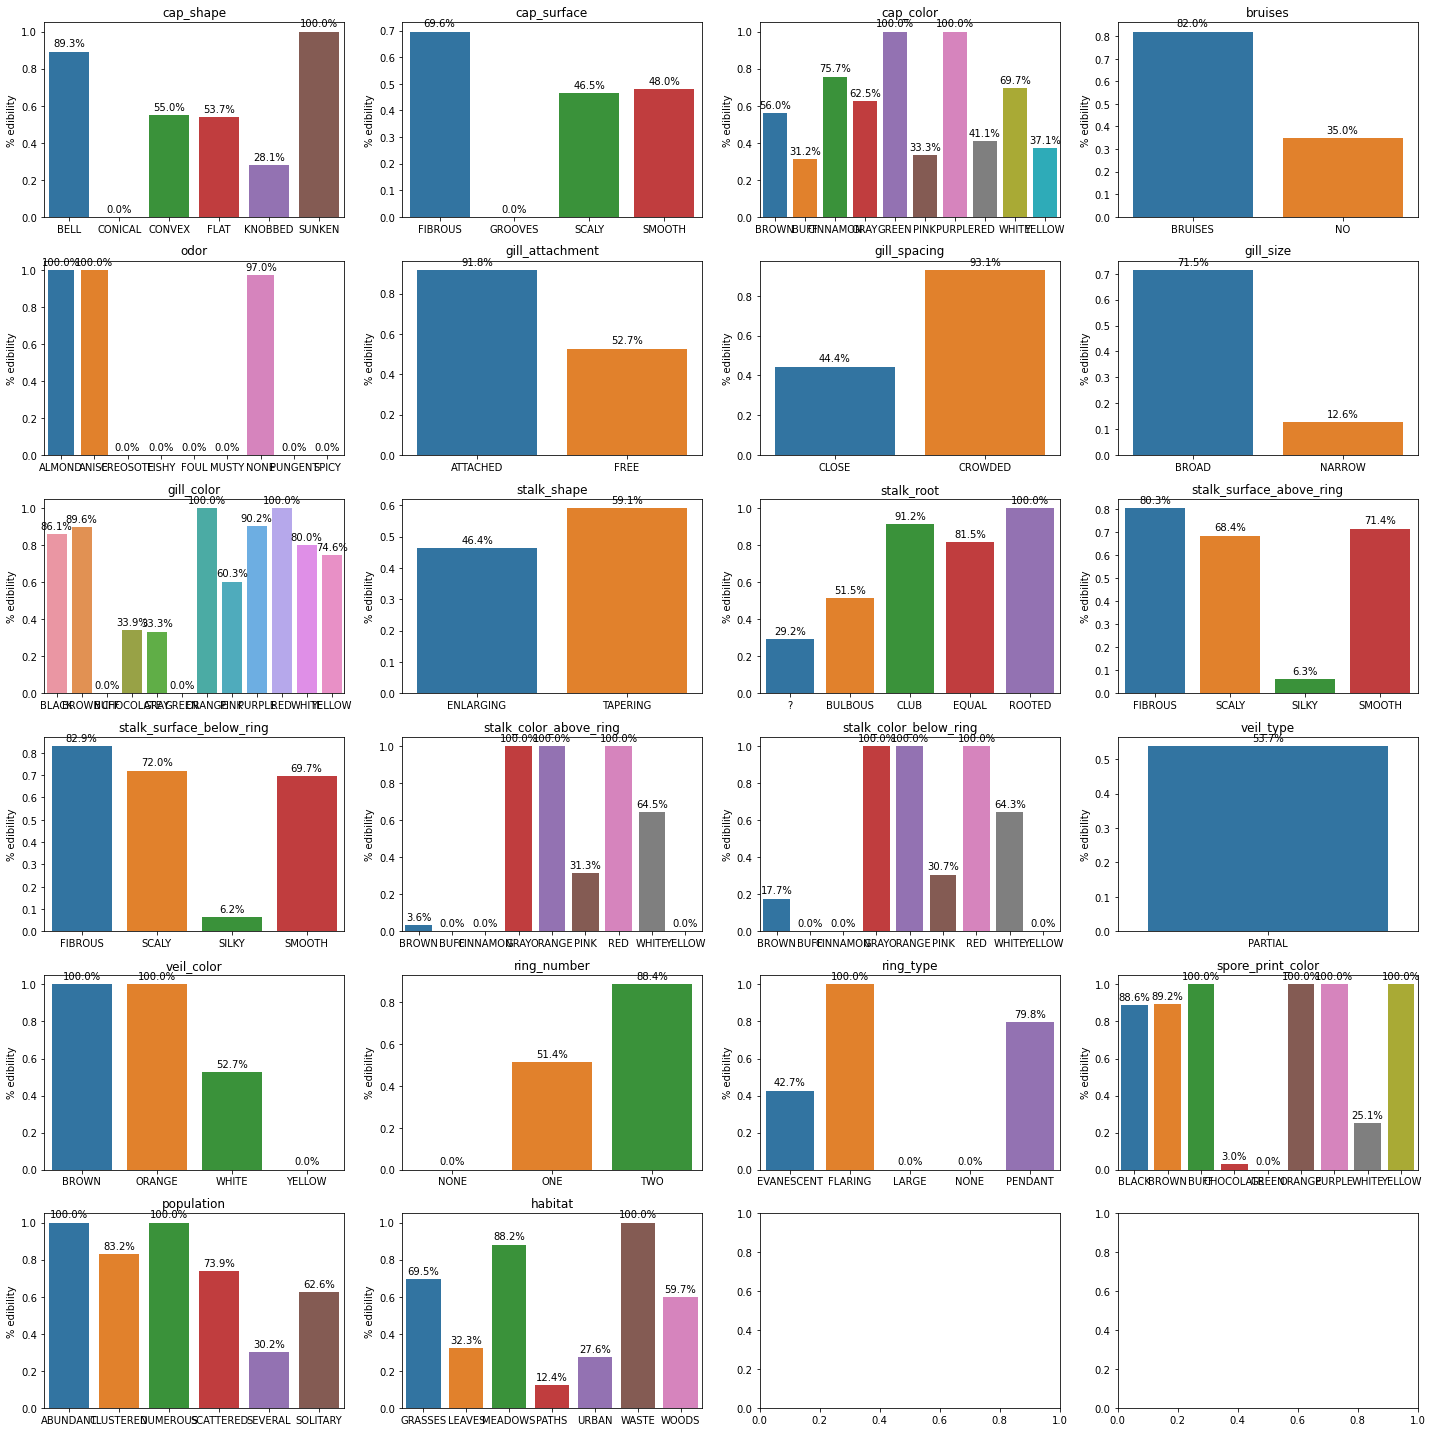

In [18]:
fig, axs = plt.subplots(6, 4, figsize=(20, 20))
for i, predictor in enumerate(predictors):
    row = i // 4
    col = i % 4
    data = train[['edibility', predictor]].groupby([predictor], as_index=False).mean()
    sns.barplot(x=predictor, y='edibility', data=data, ax=axs[row, col])
    axs[row, col].set_title(f'{predictor}')
    axs[row, col].set_xlabel('')
    axs[row, col].set_ylabel('% edibility')
    for rect in axs[row, col].patches:
        height = rect.get_height()
        axs[row, col].annotate(f'{height:.1%}', xy=(rect.get_x() + rect.get_width() / 2, height), 
                               xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [19]:
train.loc[train.odor == 'NONE'].edibility.mean()

0.9696870925684485

## Model

### Model 1: Odor as Sole Predictor

### Model 2: Multiple Logistic Regression

In [20]:
train.columns

Index(['edibility', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [21]:
model = sm.logit(formula = 'edibility~habitat', data = train).fit()
model.summary()

         Current function value: 0.582508
         Iterations: 35


/Users/lucyhan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              edibility   No. Observations:                 6733
Model:                          Logit   Df Residuals:                     6726
Method:                           MLE   Df Model:                            6
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.1562
Time:                        22:58:02   Log-Likelihood:                -3922.0
converged:                      False   LL-Null:                       -4648.2
Covariance Type:            nonrobust   LLR p-value:                1.176e-310
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.8234      0.049     16.716      0.000       0.727       0.920
habitat[T.LEAVES]     -1.5632      0.096    -16.350      0.000      -1.751      -1.376
habitat[T.MEADOWS]     1.1841      0.211      5.617      0.000       0.771       1.597
habitat[T.PATHS]      -2.7818      0.112    -24.945      0.000      -3.000      -2.563
habitat[T.URBAN]      -1.7885      0.140    -12.746      0.000      -2.064      -1.513
habitat[T.WASTE]      19.7340   2392.479      0.008      0.993   -4669.439    4708.907
habitat[T.WOODS]      -0.4312      0.064     -6.754      0.000      -0.556      -0.306
======================================================================================
"""

## Model accuracy: Confusion matrix & metrics

Goals: We need to prioritize on minimizing **False Positive Rate** as compared to other metrics.
- **True positives**: The number of observations correctly classified as edible
- **False positives**: The number of observations falsely classified as edible, and are in fact poisonous
- **True negatives**: The number of observations correctly classified as poisonous
- **False negatives**: The number of observations falsely classified as poisonous, and are in fact edible

Our stakeholders only care about eating or cooking mushrooms that are edible. In this case, we want to minimize False Positive Rate. We do not care about if False Negatives are high, because even if edible mushrooms are falsely classified as poisonous, that will not lead to unintended consequences for our stakeholders.

In [22]:
#Function to compute confusion matrix and prediction accuracy
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
    pred_values = model.predict(data)
    bins=np.array([0,cutoff,1])
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

Classification accuracy = 69.6%
Precision = 66.2%
TPR or Recall = 88.6%
FNR = 11.4%
FPR = 52.5%
ROC-AUC = 73.1%


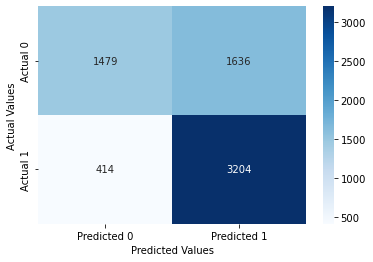

In [23]:
confusion_matrix_data(train,train.edibility,model,0.5)

# ROC-AUC

0.7309583702674429


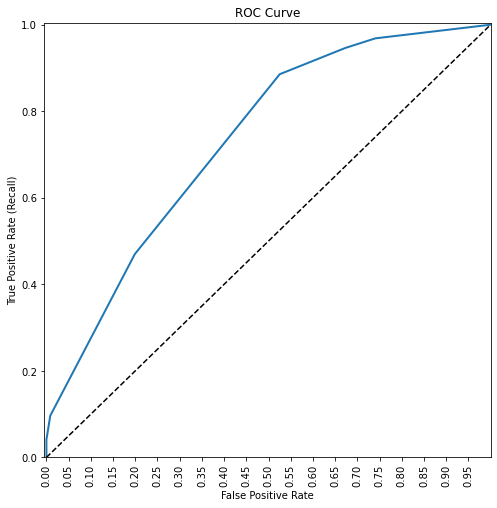

In [25]:
from sklearn.metrics import roc_curve, auc
y=train.edibility
ypred = model.predict(train)
fpr, tpr, auc_thresholds = roc_curve(y, ypred)
print(auc(fpr, tpr))# AUC of ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
plot_roc_curve(fpr, tpr)

## Cross-Validation?

In [ ]:
ov